In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"amazon_alexa.tsv", sep="\t", quoting=3)

In [3]:
data.shape

(3150, 5)

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
data.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [6]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [7]:
data[data["verified_reviews"].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [8]:
data.dropna(inplace=True)

In [9]:
data.shape


(3149, 5)

In [10]:
data["length"] = data["verified_reviews"].apply(len)

In [11]:
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382


In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
print(data.iloc[10]["verified_reviews"])
print(len(data.iloc[10]["verified_reviews"]))
print(data.iloc[10]["length"])

"I sent it to my 85 year old Dad, and he talks to it constantly."
65
65


In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [15]:
(data["rating"].value_counts())

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

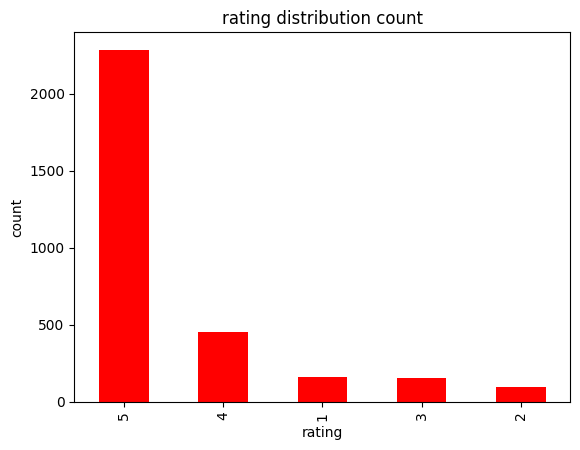

In [16]:
data["rating"].value_counts().plot.bar(color='red')
plt.title("rating distribution count")
plt.ylabel("count")
plt.xlabel("rating")
plt.show()

In [17]:
round(data["rating"].value_counts()/data.shape[0]*100,2)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64

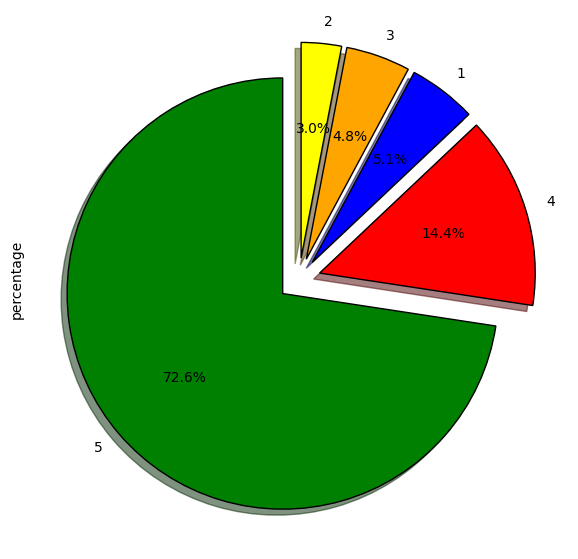

In [18]:
fig = plt.figure(figsize=(7, 7))
colors = ['green', 'red', 'blue', 'orange', 'yellow']
wp = {'linewidth': 1, "edgecolor": 'black'}
tags = data["rating"].value_counts() / data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Corrected line:
tags.plot(kind='pie', 
          autopct="%1.1f%%", 
          shadow=True, 
          colors=colors, 
          startangle=90, 
          wedgeprops=wp, 
          explode=explode, 
          label='percentage')

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')


In [20]:
data["feedback"].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [21]:
review_0 = data[data['feedback']==0].iloc[1]['verified_reviews']

In [22]:
review_0

'Sound is terrible if u want good music too get a bose'

In [23]:
review_1 = data[data['feedback']==1].iloc[1]['verified_reviews']

In [24]:
review_1

'Loved it!'

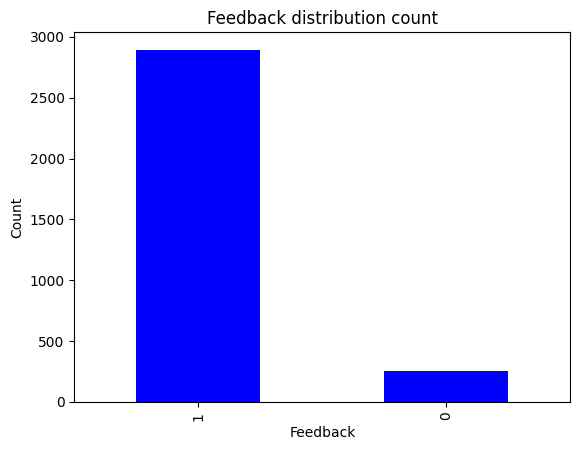

In [25]:
data['feedback'].value_counts().plot.bar(color= 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [26]:
round(data['feedback'].value_counts()/data.shape[0]*100,2)

feedback
1    91.87
0     8.13
Name: count, dtype: float64

<Axes: ylabel='Percentage wise distrubution of feedback'>

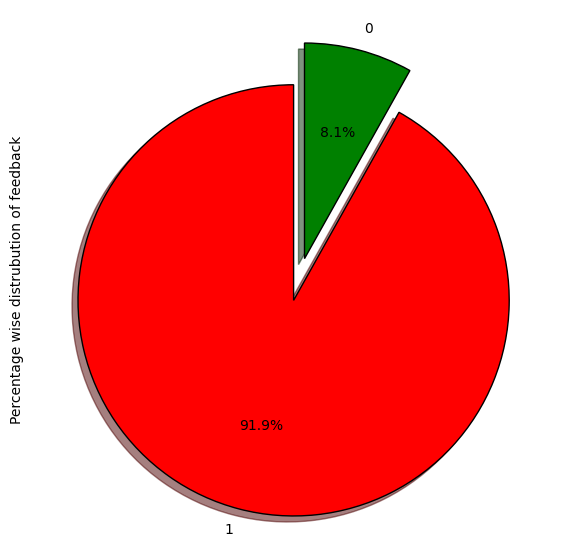

In [32]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [34]:
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [35]:
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [36]:
# if rating of review is 1 or 2 then its a negative review(0) and if the rating of review is  3,4 or 5 then it is considered as positive review (1)

In [39]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

Text(0.5, 0, 'variations')

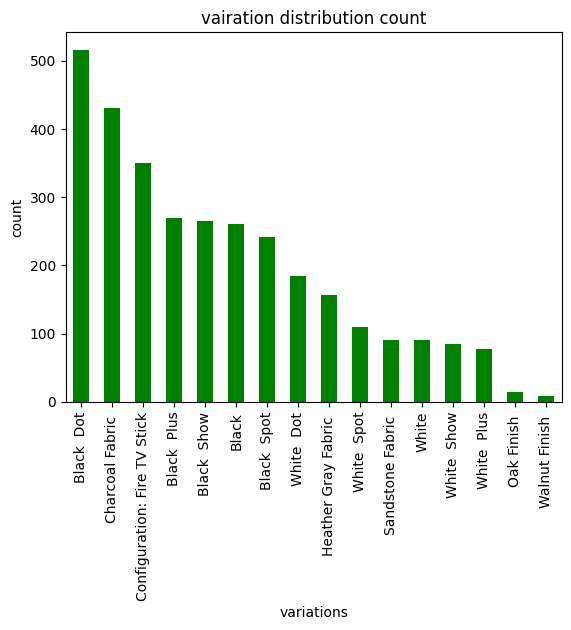

In [43]:
data['variation'].value_counts().plot.bar(color = 'green')
plt.title('vairation distribution count')
plt.ylabel('count')
plt.xlabel('variations')

In [45]:
round(data['variation'].value_counts()/data.shape[0]*100,2)

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64

In [47]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

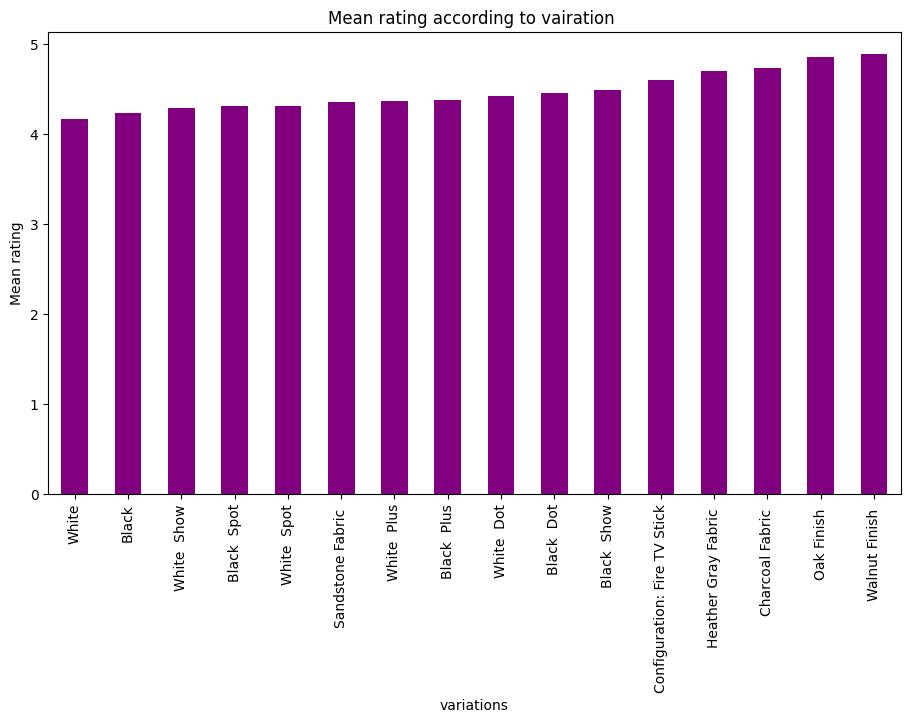

In [53]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'purple',figsize = (11,6))
plt.title('Mean rating according to vairation ')
plt.ylabel('Mean rating')
plt.xlabel('variations')
plt.show()

In [54]:

data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'distribution of length of review')]

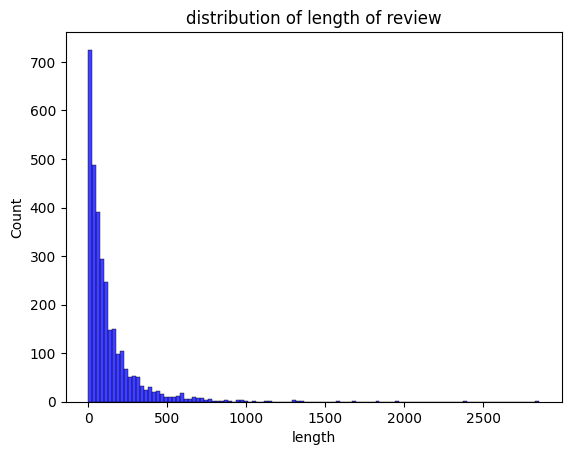

In [55]:
sns.histplot(data['length'],color = 'blue').set(title = 'distribution of length of review')

[Text(0.5, 1.0, 'distribution of length of review')]

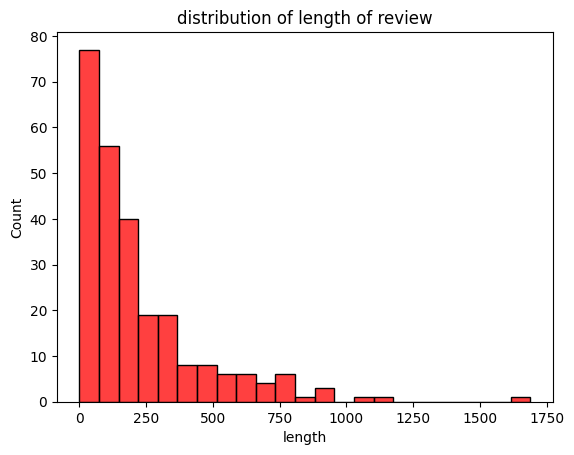

In [58]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title = 'distribution of length of review')

[Text(0.5, 1.0, 'distribution of length of review')]

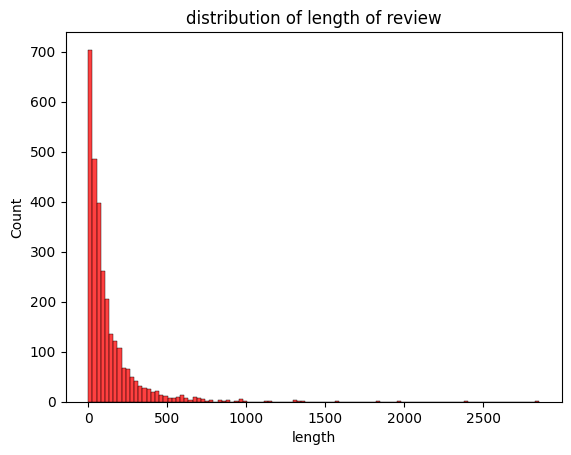

In [59]:
sns.histplot(data[data['feedback']==1]['length'],color='red').set(title = 'distribution of length of review')

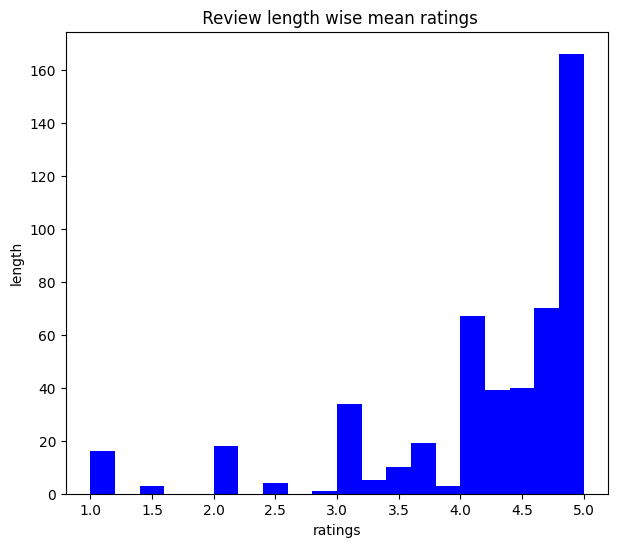

In [60]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
cv = CountVectorizer( stop_words = 'english')
words =  cv.fit_transform(data.verified_reviews)

In [72]:
!pip install wordcloud
from wordcloud import WordCloud

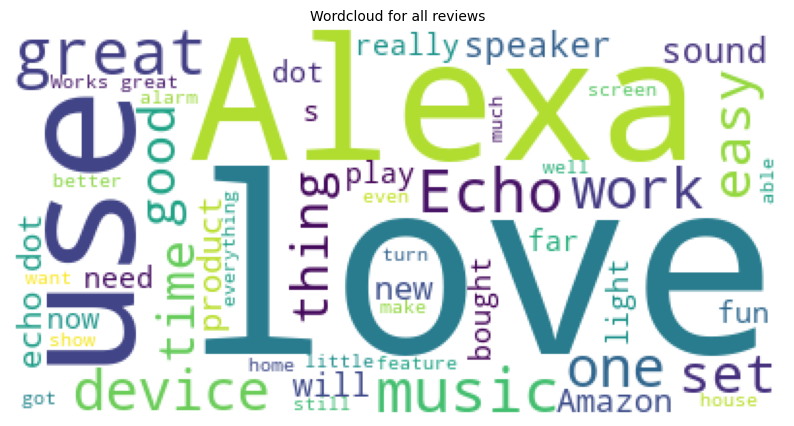

In [73]:
reviews = " ".join([review for review in data['verified_reviews']])

wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [77]:

neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()


unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

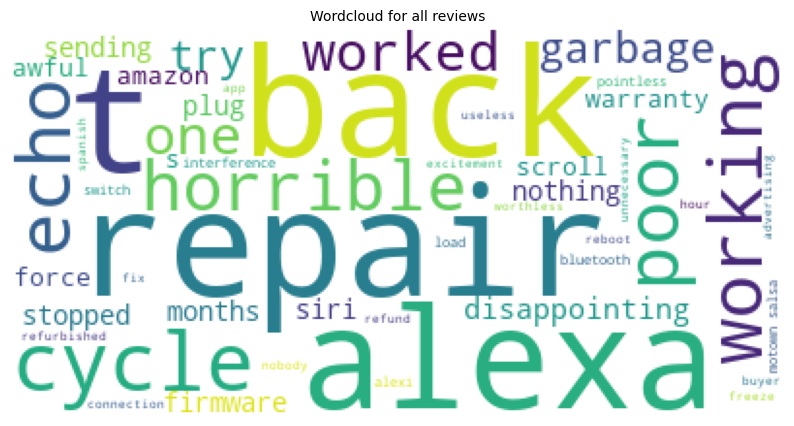

In [78]:
reviews = " ".join([review for review in data['verified_reviews']])

wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

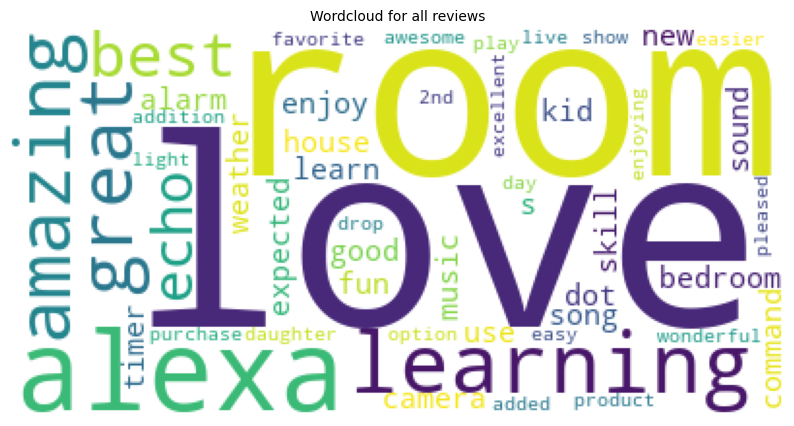

In [79]:
reviews = " ".join([review for review in data['verified_reviews']])

wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [81]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 59.6 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------

In [90]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords (only once)
nltk.download('stopwords')

stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

corpus = []
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
cv  = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [102]:
import pickle
import os

os.makedirs('Models', exist_ok=True)
pickle.dump(cv,open('Models/countVectorizer.pkl', 'wb'))

In [104]:
print(f"X shape: {x.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.3,random_state=15)

In [109]:
print(f"X train: {x_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {x_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [111]:
print(f"X train max value: {x_train.max()}")
print(f"X test max value: {x_test.max()}")

X train max value: 12
X test max value: 10


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)


In [113]:
pickle.dump(scaler ,open('Models/scaler.pkl','wb'))

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest =  RandomForestClassifier()
forest.fit(x_train_scl,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
forest.score(x_train_scl,y_train)

0.9945553539019963

In [118]:
forest.score(x_test_scl,y_test)

0.9407407407407408

In [119]:
y_preds = forest.predict(x_test_scl)

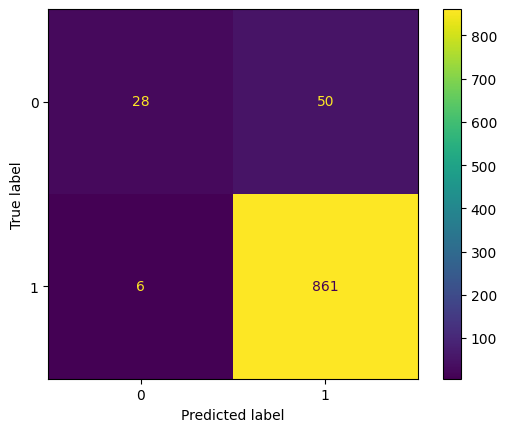

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay

cm  = confusion_matrix(y_test,y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
cm_display.plot()
plt.show()

In [129]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = forest, X = x_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9333093377211025
Standard Variance : 0.00698549121852689


In [142]:
params = {
    'bootstrap':[True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators' : [100,300]
}

In [143]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_object = StratifiedKFold(n_splits=2)

grid_search = GridSearchCV(
    estimator=forest,         
    param_grid=params,
    cv=cv_object,
    verbose=0,
    return_train_score=True
)

grid_search.fit(x_train_scl, y_train.ravel())  


,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True], 'max_depth': [80, 100], 'min_samples_split': [8, 12], 'n_estimators': [100, 300]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [144]:
print('best parameter combination:{}'.format(grid_search.best_params_))

best parameter combination:{'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [145]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.83529945553538
Cross validation mean accuracy on test set : 92.17899274047187
Accuracy score for test set : 0.9407407407407408


In [150]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train_scl, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [152]:
print("Training Accuracy :", model_xgb.score(x_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(x_test_scl, y_test))

Training Accuracy : 0.9718693284936479
Testing Accuracy : 0.9375661375661376


In [154]:
y_preds = model_xgb.predict(x_test)
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 35  43]
 [ 18 849]]


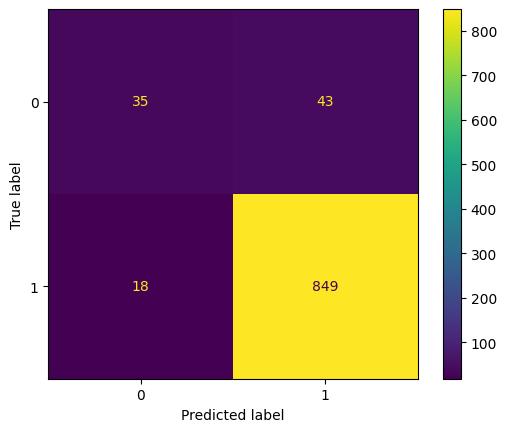

In [155]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [156]:
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [158]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_scl, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [160]:
print("Training Accuracy :", model_dt.score(x_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(x_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9206349206349206


In [162]:
y_preds = model_dt.predict(x_test)
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 38  40]
 [ 82 785]]


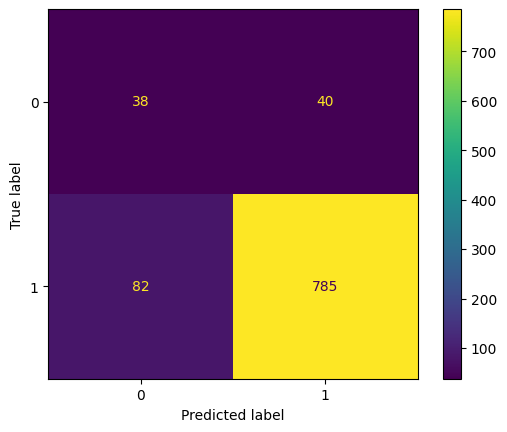

In [163]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()